In [3]:
import json
import time
from scipy.stats import norm
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import numpy as np

In [4]:
f = open('./result.json', 'r')
pit_times = json.load(f)
f.close()
pit_times

{'01': [0],
 '55': [0],
 '31': [0],
 '10': [0],
 '5': [0],
 '60': [0],
 '4': [0],
 '3': [0],
 '39': [0],
 '12': [0],
 '23': [0],
 '96': [0],
 '1': [0],
 '76': [0],
 '66': [0],
 '28': [0],
 '75': [0],
 '19': [0],
 '88': [0],
 '14': [0]}

In [5]:
def get_last_pit(pit_times, car, time):
    lp = max([t for t in pit_times[car] if t <= time])
    return (time - lp) / 60

In [6]:
def get_risk_score(x):
    MEAN1 = 0
    STD1 = 21.751478190190515
    return norm.pdf(x, MEAN1, STD1)*10

In [7]:
agg_risk = {}
counter = 0

0.0
3.6681854622767474


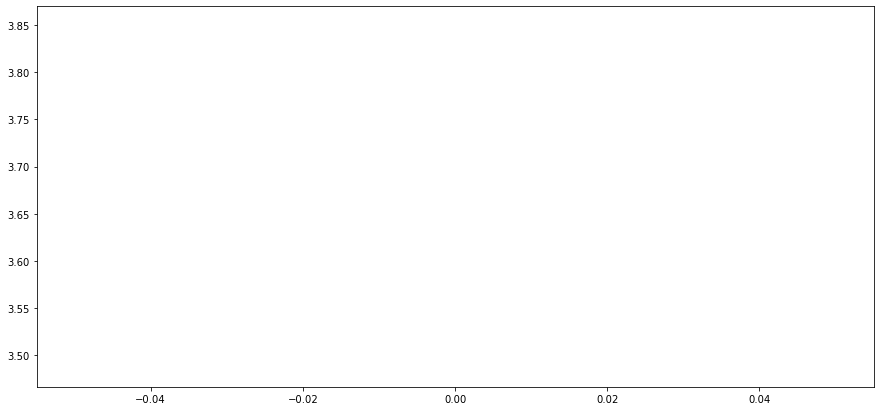

KeyboardInterrupt: 

In [8]:
while True:
    f = open('./current_time.json', 'r')
    current_time = json.load(f)['0']
    f.close()
    print(current_time)
    risk = 0
    for driver in pit_times:
        risk += get_risk_score(get_last_pit(driver, current_time))    

    
    agg_risk[current_time] = risk
    counter += 1
    print(risk)
    plt.figure(figsize=(15,7))
    plt.plot(list(agg_risk.keys()), list(agg_risk.values()))
    plt.show()
    time.sleep(60)


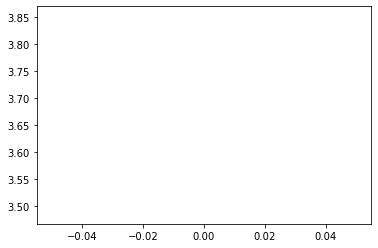

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
agg_risk = {}
def animate(i):
    f = open('./current_time.json', 'r')
    current_time = json.load(f)['0']
    f.close()
    f = open('./result.json', 'r')
    pit_times = json.load(f)
    f.close()
    risk = 0
    for driver in pit_times:
        risk += get_risk_score(get_last_pit(driver, current_time))   
    agg_risk[current_time] = risk
    xar = list(agg_risk.keys())
    yar = list(agg_risk.values())
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

RuntimeError: Cannot run the event loop while another loop is running